## Incorp


Objetivo: Saber qual são os melhores locais para lançar produtos e o que lançar, tipo do produto.
Principais indicadores até agora: 
R$/m2 para ter uma noção de lucro
VSO para saber sobre aceitação do produto e demanda x oferta

Imports:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/pesquisa editado transformado csv.csv', sep=';')


In [3]:
df.head()

,RGI,Código no Mapa,Empreendimento,Edifício,Zona de Valor,Endereço,Bairro,Distrito,Região,Cidade,...,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,VGV,Modalidade,Banco.1,Condições de pagamento,Responsabilidade do Comprador,Data Pesquisa
0,311661117.0,1.0,AF ESPLENDORE,NaN,SOROCABA - SP,R AMERICO BRASILIENSE. 426,VILA HARO,SEM DISTRITO,NaN,SOROCABA,...,37.5,62.5,15.0,25.0,8290040.0,Preço Fechado,NaN,NaN,NaN,43349.0
1,311661117.0,1.0,AF ESPLENDORE,NaN,SOROCABA - SP,R AMERICO BRASILIENSE. 426,VILA HARO,SEM DISTRITO,NaN,SOROCABA,...,0.0,100.0,0.0,4.0,733200.0,Preço Fechado,NaN,NaN,NaN,43349.0
2,324011015.0,2.0,ALICE RESIDENCIAL,NaN,SOROCABA - SP,R JOAO CORDEIRO. 255,VILA PROGRESSO,SEM DISTRITO,NaN,SOROCABA,...,100.0,0.0,10.0,0.0,2355100.0,Preço Fechado,NaN,NaN,NaN,43174.0
3,324011015.0,2.0,ALICE RESIDENCIAL,NaN,SOROCABA - SP,R JOAO CORDEIRO. 255,VILA PROGRESSO,SEM DISTRITO,NaN,SOROCABA,...,100.0,0.0,10.0,0.0,2631100.0,Preço Fechado,NaN,NaN,NaN,43069.0
4,36231716.0,3.0,ALTOS DO PACO,NaN,SOROCABA - SP,R JOSE RUSCONI FRANCISCO. 150,JARDIM DO PACO,SEM DISTRITO,NaN,SOROCABA,...,75.0,25.0,18.0,6.0,5880000.0,Preço de Custo,NaN,NaN,NaN,43361.0


In [4]:
df.shape

(378, 73)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 73 columns):
RGI                                                377 non-null float64
Código no Mapa                                     377 non-null float64
Empreendimento                                     377 non-null object
Edifício                                           216 non-null object
Zona de Valor                                      377 non-null object
Endereço                                           377 non-null object
Bairro                                             377 non-null object
Distrito                                           377 non-null object
Região                                             83 non-null object
Cidade                                             377 non-null object
UF                                                 377 non-null object
CEP                                                377 non-null object
Zoneamento                                

# Copiando data frame

In [23]:
df_c = df.copy()

In [24]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 73 columns):
RGI                                                377 non-null float64
Código no Mapa                                     377 non-null float64
Empreendimento                                     377 non-null object
Edifício                                           216 non-null object
Zona de Valor                                      377 non-null object
Endereço                                           377 non-null object
Bairro                                             377 non-null object
Distrito                                           377 non-null object
Região                                             83 non-null object
Cidade                                             377 non-null object
UF                                                 377 non-null object
CEP                                                377 non-null object
Zoneamento                                

In [25]:
df_c.head()

,RGI,Código no Mapa,Empreendimento,Edifício,Zona de Valor,Endereço,Bairro,Distrito,Região,Cidade,...,% Unidades Vendidas,% Unidades a Vender,Unidades Vendidas,Qtd em Estoque,VGV,Modalidade,Banco.1,Condições de pagamento,Responsabilidade do Comprador,Data Pesquisa
0,311661117.0,1.0,AF ESPLENDORE,NaN,SOROCABA - SP,R AMERICO BRASILIENSE. 426,VILA HARO,SEM DISTRITO,NaN,SOROCABA,...,37.5,62.5,15.0,25.0,8290040.0,Preço Fechado,NaN,NaN,NaN,43349.0
1,311661117.0,1.0,AF ESPLENDORE,NaN,SOROCABA - SP,R AMERICO BRASILIENSE. 426,VILA HARO,SEM DISTRITO,NaN,SOROCABA,...,0.0,100.0,0.0,4.0,733200.0,Preço Fechado,NaN,NaN,NaN,43349.0
2,324011015.0,2.0,ALICE RESIDENCIAL,NaN,SOROCABA - SP,R JOAO CORDEIRO. 255,VILA PROGRESSO,SEM DISTRITO,NaN,SOROCABA,...,100.0,0.0,10.0,0.0,2355100.0,Preço Fechado,NaN,NaN,NaN,43174.0
3,324011015.0,2.0,ALICE RESIDENCIAL,NaN,SOROCABA - SP,R JOAO CORDEIRO. 255,VILA PROGRESSO,SEM DISTRITO,NaN,SOROCABA,...,100.0,0.0,10.0,0.0,2631100.0,Preço Fechado,NaN,NaN,NaN,43069.0
4,36231716.0,3.0,ALTOS DO PACO,NaN,SOROCABA - SP,R JOSE RUSCONI FRANCISCO. 150,JARDIM DO PACO,SEM DISTRITO,NaN,SOROCABA,...,75.0,25.0,18.0,6.0,5880000.0,Preço de Custo,NaN,NaN,NaN,43361.0


# Preenchendo NaN

In [29]:
df_c['Edifício']= df_c['Edifício'].fillna(value='edificio')

In [30]:
df_c['Região']=df_c['Região'].fillna(value='Região')

In [32]:
df_c['Zoneamento']=df_c['Zoneamento'].fillna(value='Zoneamento')

In [35]:
df_c['Classificação do tipo'] = df_c['Classificação do tipo'].fillna(value='Classificação do tipo') 

In [37]:
df_c['Área Total Construída'] = df_c['Área Total Construída'].fillna(value=0)

In [45]:
#drops a coluna Registro de incoporação já havia sido dropada, essa celula foi atualizada. RGI exite
df_c = df_c.drop(['Incorporadora 3', 'Incorporadora 4', 'Vendedora 3', 'Vendedora 4'], axis=1)

In [41]:
df_c['Infraestrutura'] = df_c['Infraestrutura'].fillna(value='Infraestrutura')

In [47]:
df_c = df_c.drop(['Incorporadora 2', 'Construtora 2', 'Condições de pagamento', 'Responsabilidade do Comprador'], axis=1)

In [49]:
df_c['Vendedora 2'] = df_c['Vendedora 2'].fillna(value='Vendedora 2')

In [51]:
df_c['Banco'] = df_c['Banco'].fillna(value='Banco')

In [52]:
df_c['Banco.1'] = df_c['Banco.1'].fillna(value='Banco')

In [53]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 64 columns):
RGI                                                377 non-null float64
Código no Mapa                                     377 non-null float64
Empreendimento                                     377 non-null object
Edifício                                           378 non-null object
Zona de Valor                                      377 non-null object
Endereço                                           377 non-null object
Bairro                                             377 non-null object
Distrito                                           377 non-null object
Região                                             378 non-null object
Cidade                                             377 non-null object
UF                                                 377 non-null object
CEP                                                377 non-null object
Zoneamento                               

Agora vamos plotar os gráficos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E6DE2E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002A175F28>], dtype=object)

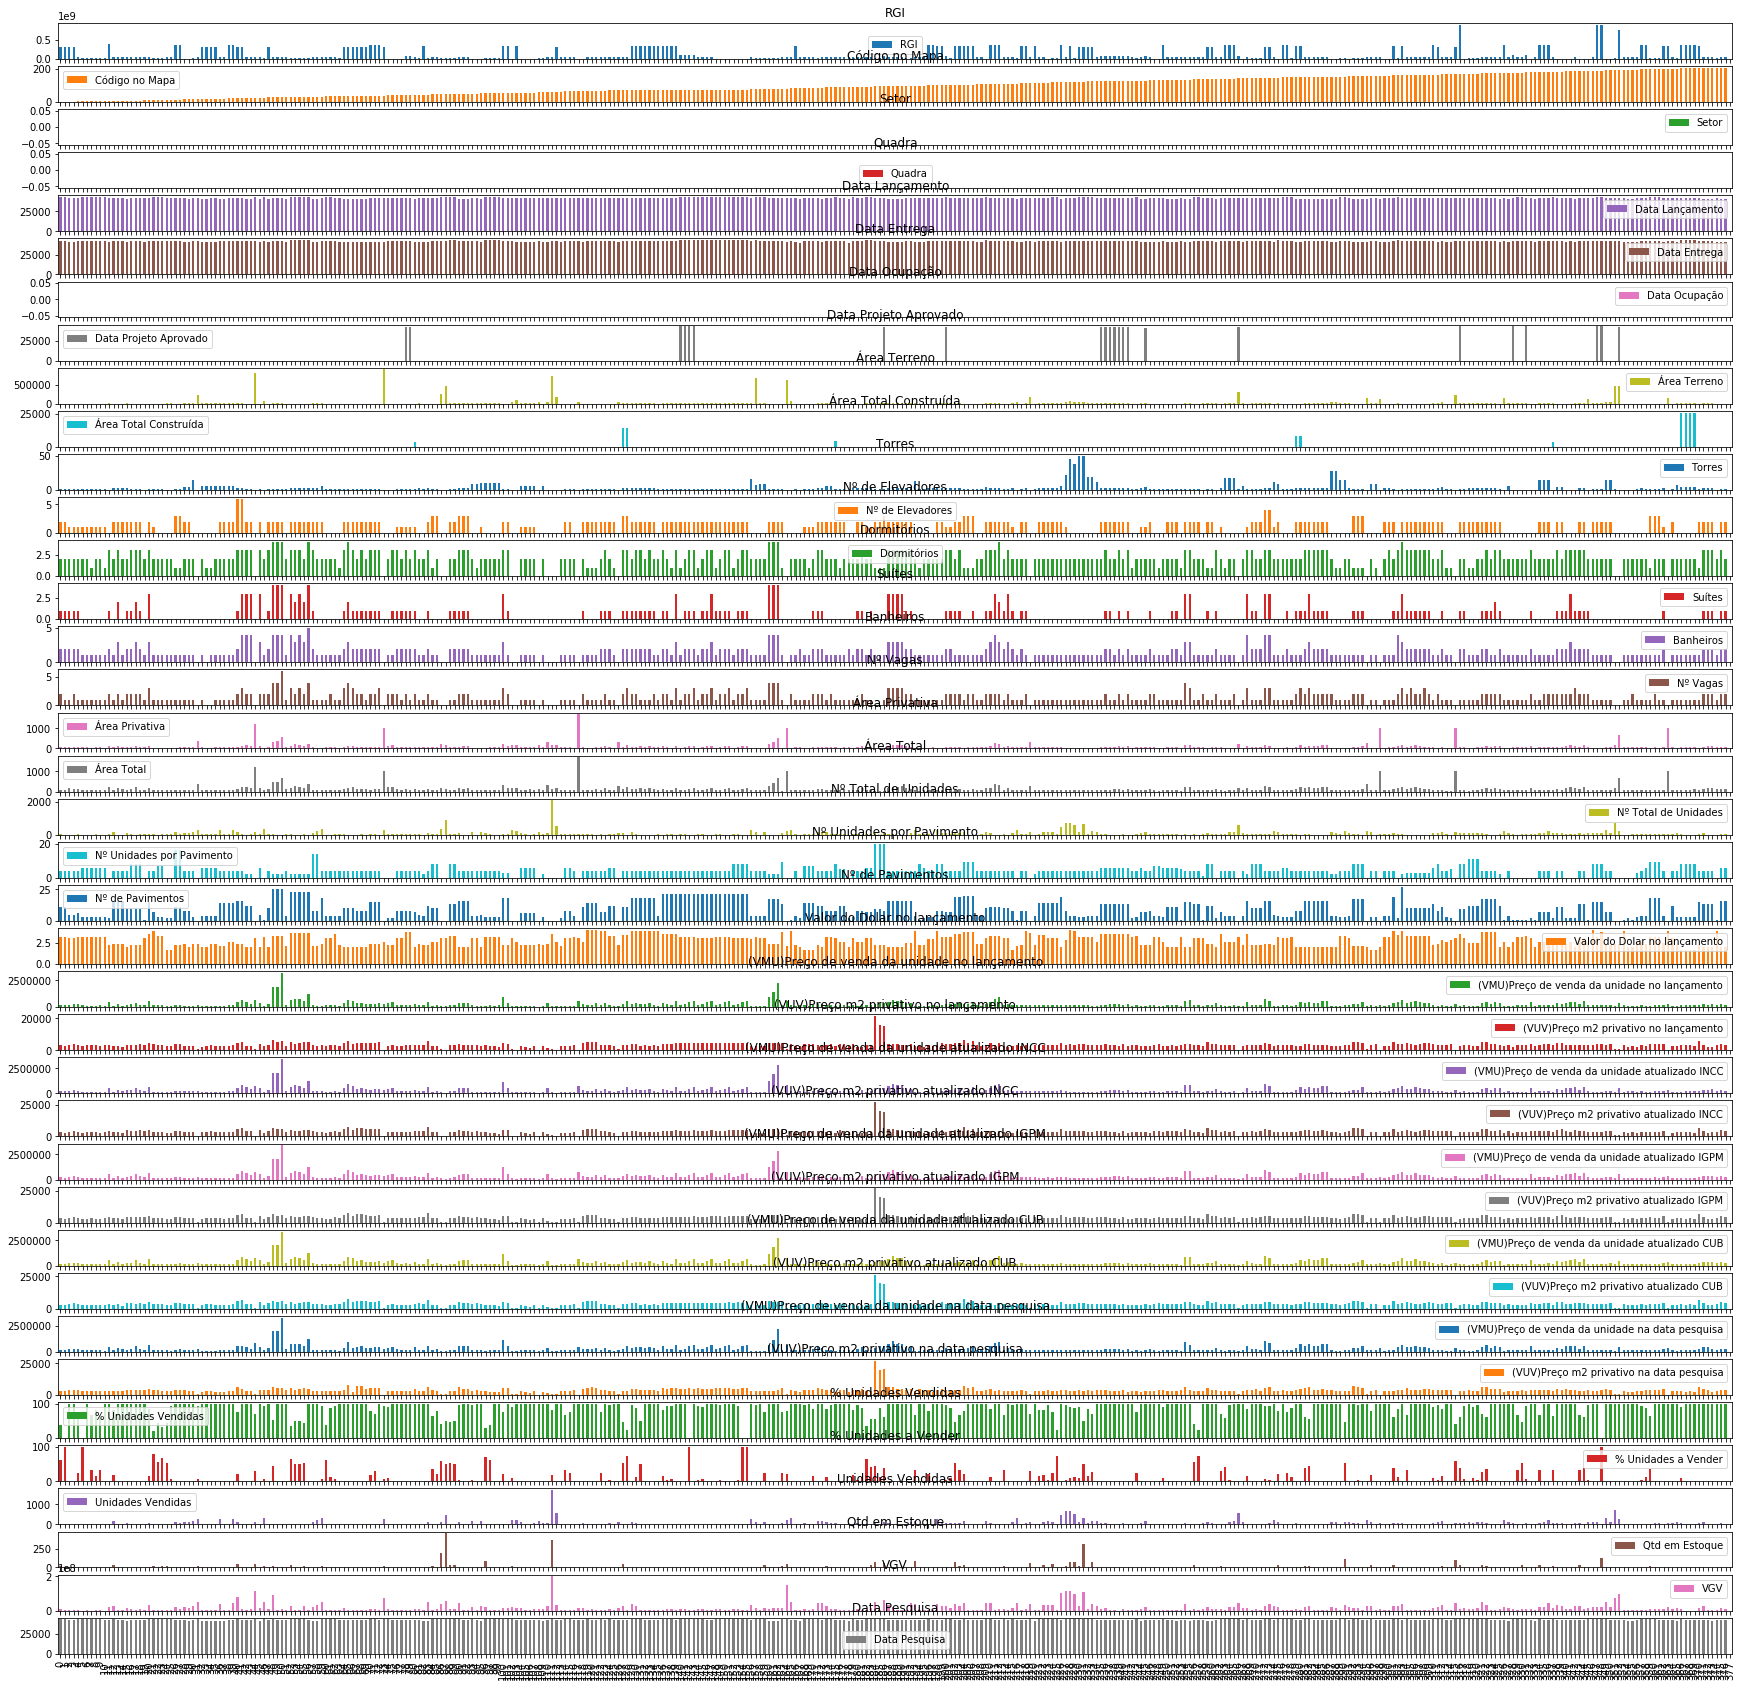

In [62]:
df_c.plot(kind='bar',subplots=True, figsize=(30,30))

count      377.000000
mean      4061.274085
std       2063.021548
min        238.840000
25%       3345.950000
50%       3907.240000
75%       4624.930000
max      26799.040000
Name: (VUV)Preço m2 privativo atualizado IGPM, dtype: float64

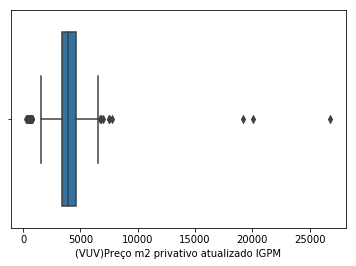

In [92]:
sns.boxplot(df_c['(VUV)Preço m2 privativo atualizado IGPM'])
df_c['(VUV)Preço m2 privativo atualizado IGPM'].describe()

In [100]:
features = list(df_c)

In [104]:
features[1]

'Código no Mapa'

In [113]:
(len(features))

64

In [126]:
df_c.iloc[:,2]

0               AF ESPLENDORE
1               AF ESPLENDORE
2           ALICE RESIDENCIAL
3           ALICE RESIDENCIAL
4               ALTOS DO PACO
5                    ALVORADA
6                    ALVORADA
7                    ALVORADA
8                    ALVORADA
9                    ALVORADA
10                   ALVORADA
11                   ARVOREDO
12        ARVORES DA AMAZONIA
13        ARVORES DA AMAZONIA
14        ARVORES DA AMAZONIA
15            ATELIE CAMPOLIM
16                     ATRIUM
17                     ATRIUM
18                     ATRIUM
19                    BEATRIZ
20                  BEETHOVEN
21                 BELISSIMUS
22                 BELLA PARK
23                 BELLA PARK
24                BELLA VILLE
25                BELLA VILLE
26      BLUE AFONSO VERGUEIRO
27      BLUE AFONSO VERGUEIRO
28          BOSQUE DE CORDOBA
29           BOSQUE DE MADRID
                ...          
348       VILLAGE MONTE VERDE
349       VILLAGGIO DI VENETO
350       

TypeError: 'Series' objects are mutable, thus they cannot be hashed

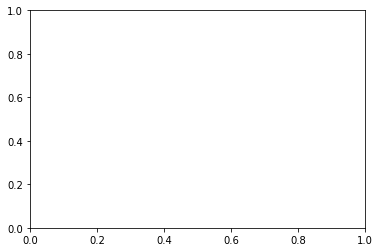

In [135]:
df_c.boxplot(column=df_c.iloc[:,34],grid= True)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

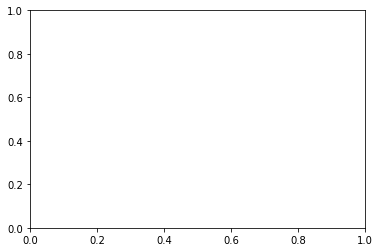

In [127]:
for i in range (len(features)):
    df_c.boxplot(column=df_c.iloc[:,i],grid= True)

TypeError: boxplot() got an unexpected keyword argument 'title'

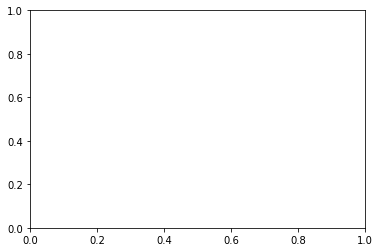

In [112]:
for i in range (len(features)):
    sns.boxplot(data = df_c[features[i]],)


In [91]:
df_c['Empreendimento'].value_counts()

LE MONDE CAMPOLIM         20
PASSEO CONDOMINIO CLUB     7
ALVORADA                   6
LA VISTA MONCAYO           6
TORRE ALPHA MANGAL         6
SOLEIL DE QUEBEC           6
DOC CAMPOLIM               5
BOULEVARD IPANEMA          4
IMAGINE IPANEMA            4
WANELL CLUB                4
JARDIM DAS TULIPAS         4
VANCOUVER                  4
MONT ROYAL                 4
FLOR DE ACACIA             4
SAFIRA                     3
VILLAGE MONTE VERDE        3
LEXUS TOWER                3
WINNER                     3
JK STUDIO                  3
VITALLI BONELLI            3
VALE VERDE IPANEMA         3
RESERVA DO HORTO           3
UP RESIDENCIAL             3
ILE NOTRE-DAME             3
LUNNA CAMPOLIN             3
PREMIERE                   3
VILLA DE ESPANHA           3
ARVORES DA AMAZONIA        3
NOTTING HILL               3
ATRIUM                     3
                          ..
ELEGANCE SOROCABA          1
ORQUIDEAS                  1
TORRES DE MALAGA           1
TRIX HOME HORT

## LEmbrar de normalizar as features, clusterizar